In [1]:
# # 시각화할 때 한글 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic'
# import matplotlib as mlp
# mlp.rcParams["axes.unicode_minus"] = False

from google.colab import drive
import glob

import warnings
warnings.filterwarnings(action='ignore')

# with plt.xkcd():

In [ ]:
# 구글 드라이브 연결
drive.mount("/content/gdrive/")

# data 경로 저장
data_path = "/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/"

Mounted at /content/gdrive/


# 1. 전체 카드 923종

- 2019.01.~2024.03. 4개년 정보 merge
  - top100 chart in
  - 순위평균


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/all_credit_info_4years.csv')
# df = pd.read_csv('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/preprocessing_info_4year.csv')
print(len(df))
df.head()

923


,card_company,card_name,promotions,all_promotions,fee,perform,brand,rank,chart_in
0,신한카드,신한카드 Mr.Life,"공과금 10%할인 && 마트,편의점 10%할인 && 식음료 10%할인",월납요금(공과금) 10% 할인서비스 && 편의점 10% 할인 && 병원/약국업종 1...,해외겸용 15000원,30,VISA,4.951613,1.0
1,KB국민카드,KB국민 My WE:SH 카드,KB Pay 10%할인 && 음식점 10%할인 && 서비스팩 3개 중 1개선택할인,[나한테 진심 서비스] KB Pay 10% 할인 && [나한테 진심 서비스] 음식점...,국내전용 15000원 해외겸용 15000원,40,Mastercard AMEX,1.000000,1.0
2,삼성카드,삼성카드 & MILEAGE PLATINUM (스카이패스),"1,000원당 1마일기본적립 && 커피/주유 2마일특별적립 && 인천공항 라운지무료이용","모든 가맹점 이용금액 1,000원당 1마일리지 기본적립 && 백화점 이용금액 1,0...",국내전용 47000원 해외겸용 49000원,0,AMEX,11.064516,1.0
3,신한카드,신한카드 Deep Dream,모두드림 0.7%적립 && 더해드림 2.1%적립 && 챙겨드림 3.5%적립,모두드림 - 전월 실적/적립 한도 없이 국내/외 신판(일시불+할부)이용 가맹점 0....,해외겸용 8000원,0,VISA UnionPay,5.112903,1.0
4,롯데카드,LOCA LIKIT 1.2,모든가맹점 1.2%할인 && 온라인 1.5%할인,"어디서나 1.2% 결제일 할인국내 모든 가맹점 1.2%, 해외 모든 이용금액 1.2...",국내전용 10000원 해외겸용 10000원,0,Mastercard AMEX,11.535714,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   card_company    923 non-null    object 
 1   card_name       923 non-null    object 
 2   promotions      923 non-null    object 
 3   all_promotions  921 non-null    object 
 4   fee             923 non-null    object 
 5   perform         923 non-null    int64  
 6   brand           887 non-null    object 
 7   rank            923 non-null    float64
 8   chart_in        923 non-null    float64
dtypes: float64(2), int64(1), object(6)
memory usage: 65.0+ KB


## 1-1. 카드사별 Top100에 든 고유 카드 수

In [ ]:
df['chart_in'].value_counts()

chart_in
0.0    617
1.0    306
Name: count, dtype: int64

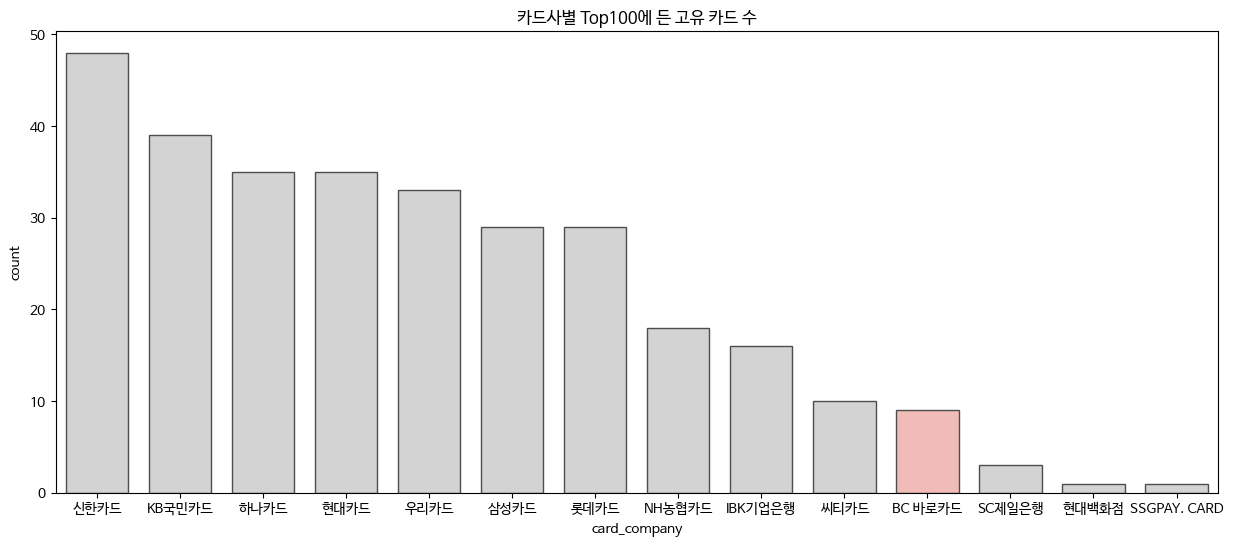

In [ ]:
# 카드사별 Top100에 든 고유 카드 수

plt.figure(figsize=(15, 6))

colors = ['LightGrey', 'LightGrey', 'LightGrey', 'LightGrey', 'LightGrey',
          'LightGrey', 'LightGrey', 'LightGrey', 'LightGrey', 'LightGrey',
          sns.color_palette('Pastel1')[0], 'LightGrey', 'LightGrey', 'LightGrey']
wedgeprops = {'linewidth': 1, 'width':1, 'edgecolor':'w'}

uni_card = pd.DataFrame(df[df['chart_in']==1]['card_company'].value_counts()).reset_index()

sns.barplot(data=uni_card, x='card_company', y='count',
            # color='LightGrey'
            palette=colors,
            edgecolor='.3', width=.75,
            ).set_title('카드사별 Top100에 든 고유 카드 수');

## 1-2. 혜택 워드클라우드

### 1-2-1. 대표 3가지

In [ ]:
import nltk
nltk.download('gutenberg') #60,000 novels available
from nltk.corpus import gutenberg
file_names = gutenberg.fileids() #import novel titles
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [ ]:
df['promotions_nlp'] = [txt.replace('&&','').replace(',', '').replace('%', '') for txt in df['promotions']]

In [ ]:
text= ''
for txt in df['promotions_nlp']:
    text += txt
    text += ' '

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w]{3,}")
reg_text = tokenizer.tokenize(text)

lemmatizer = WordNetLemmatizer()
lemreg_text = [lemmatizer.lemmatize(token, pos = 'v') for token in reg_text]

print(len(lemreg_text))
print(lemreg_text[:50])

[nltk_data] Downloading package wordnet to /root/nltk_data...


5597
['공과금', '10할인', '마트편의점', '10할인', '식음료', '10할인', 'Pay', '10할인', '음식점', '10할인', '서비스팩', '1개선택할인', '1000원당', '1마일기본적립', '2마일특별적립', '인천공항', '라운지무료이용', '모두드림', '7적립', '더해드림', '1적립', '챙겨드림', '5적립', '모든가맹점', '2할인', '온라인', '5할인', '바우처', '10만원제공', '전세계', '공항라운지', '무료이용', '국내외', '가맹점', '1하나머니', '스타벅스', '50할인', '대중교통', '10할인', 'CGV', '롯데시네마', '5000원할인', '50할인', '스트리밍', '20할인', '30할인', '대중교통', '10할인', '간편결제', '5할인']


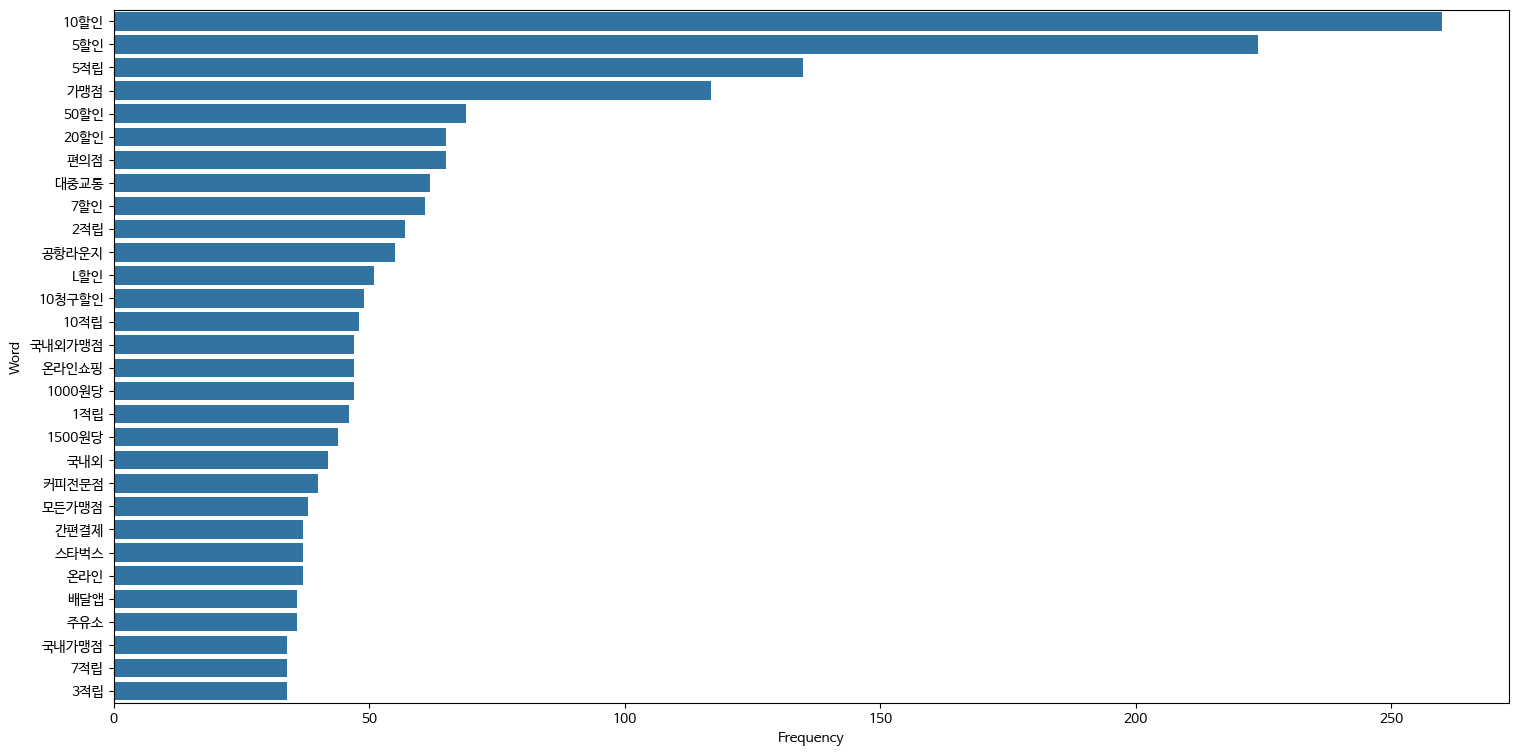

In [ ]:
from collections import Counter

word_freq = Counter(lemreg_text)

freq_df = pd.DataFrame(word_freq.items(), columns = ['Word', 'Frequency'])
freq_df = freq_df.sort_values(by = 'Frequency', ascending = False)

plt.figure(figsize=(18, 9))

sns.barplot(data=freq_df.head(30)[::1], y='Word', x='Frequency')

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

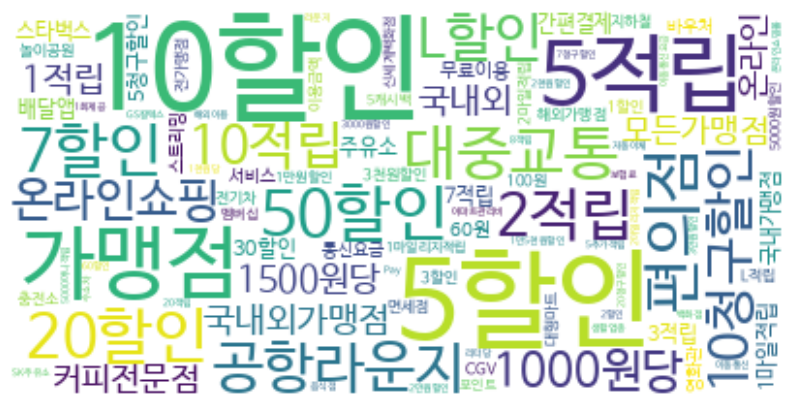

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color = "white",
               max_words = 100,
               max_font_size = 60,
               font_path='NanumBarunGothic'
               )
wc.generate_from_frequencies(word_freq)

plt.figure(figsize = (10, 6))
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

### 1-2-2. 전체 혜택

In [ ]:
df[df['all_promotions'].isnull()==True]

,card_company,card_name,promotions,all_promotions,fee,perform,brand,rank,chart_in,promotions_nlp
794,우리카드,ONLY 나만의카드,"자동납부 10%할인 && 대형할인점 2,000원할인 && 스타벅스 10%할인",NaN,국내전용 13000원 해외겸용 15000원,30,BC Mastercard,43.941176,1.0,자동납부 10할인 대형할인점 2000원할인 스타벅스 10할인
878,우리카드,카드의정석 위비온 플러스,국내가맹점 5%할인 && 해외가맹점 3%할인 && 워라밸업종 7%할인,NaN,국내전용 13000원 해외겸용 15000원,30,BC Mastercard,29.333333,1.0,국내가맹점 5할인 해외가맹점 3할인 워라밸업종 7할인


In [ ]:
df.loc[794, 'all_promotions'] = '-'
df.loc[878, 'all_promotions'] = '-'

In [ ]:
df['all_promotions_nlp'] = [txt.replace('&&','').replace(',', '').replace('%', '') for txt in df['all_promotions']]

In [ ]:
text= ''
for txt in df['all_promotions_nlp']:
    text += txt
    text += ' '

In [ ]:
tokenizer = RegexpTokenizer("[\w]{3,}")
reg_text = tokenizer.tokenize(text)

lemmatizer = WordNetLemmatizer()
lemreg_text = [lemmatizer.lemmatize(token, pos = 'v') for token in reg_text]

print(len(lemreg_text))
print(lemreg_text[:50])

13051
['월납요금', '공과금', '할인서비스', '편의점', '약국업종', '세탁소', '온라인', '식음료', '정유사', '리터당', '60원', '인테이크몰', '나한테', '서비스', 'Pay', '나한테', '서비스', '음식점', '편의점', '나한테', '서비스', '이동통신요금', '나한테', '서비스', 'OTT', '서비스', '먹는데', '서비스', '노는데', '영화관', '서비스', '관리에', '미용실', '스포츠', '온라인서점', '올리브영', '서비스', '플레이트', '가맹점', '이용금액', '1000원당', '1마일리지', '기본적립', '백화점', '이용금액', '1000원당', '2마일리지', '특별적립', '이용금액', '1000원당']


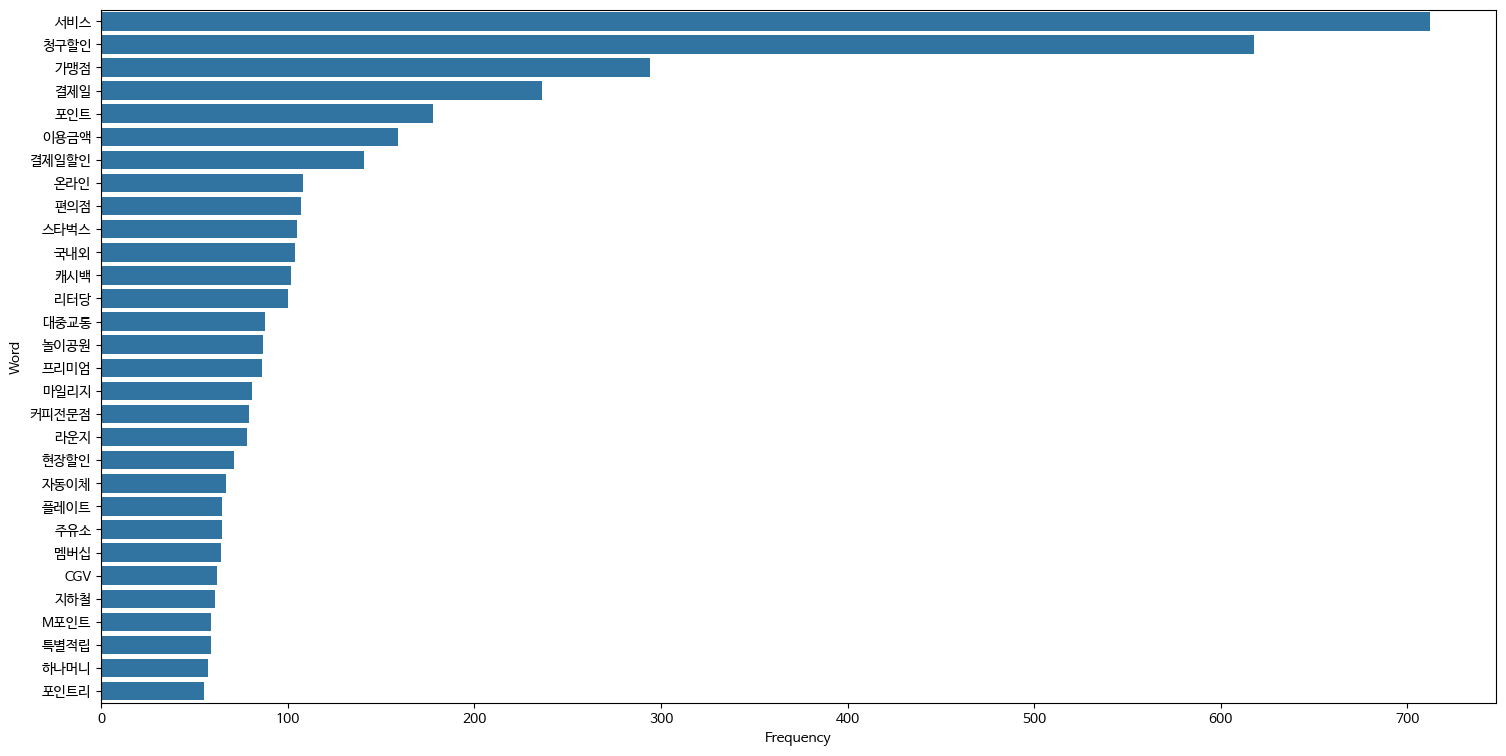

In [ ]:
word_freq = Counter(lemreg_text)

freq_df = pd.DataFrame(word_freq.items(), columns = ['Word', 'Frequency'])
freq_df = freq_df.sort_values(by = 'Frequency', ascending = False)

plt.figure(figsize=(18, 9))

sns.barplot(data=freq_df.head(30)[::1], y='Word', x='Frequency')

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

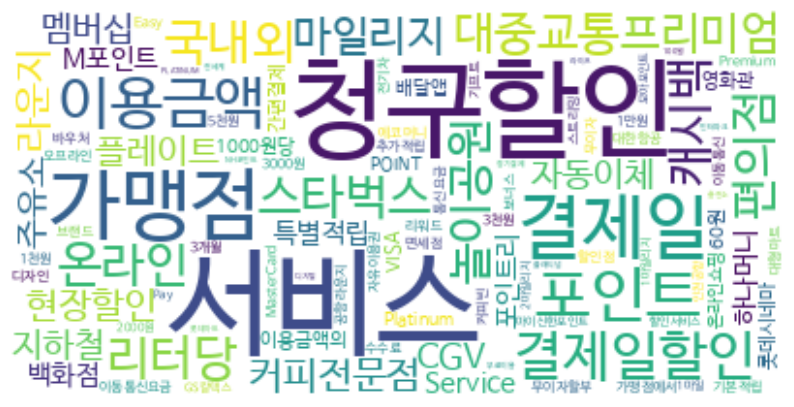

In [ ]:
wc = WordCloud(background_color = "white",
               max_words = 100,
               max_font_size = 60,
               font_path='NanumBarunGothic'
               )
wc.generate_from_frequencies(word_freq)

plt.figure(figsize = (10, 6))
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

# 2. Top100에 등장한 카드 vs 들지 못한 카드

## 2-1. 혜택 비교

### 2-1-1. 전체 혜택

In [ ]:
in_df = df[df['chart_in']==1].reset_index(drop=True)
out_df = df[df['chart_in']==0].reset_index(drop=True)
print(len(in_df), len(out_df))

306 617


In [ ]:
text_in, text_out = '', ''

for txt in in_df['all_promotions_nlp']:
    text_in += txt
    text_in += ' '

for txt in out_df['all_promotions_nlp']:
    text_out += txt
    text_out += ' '

In [ ]:
tokenizer = RegexpTokenizer("[\w]{3,}")
reg_text_in = tokenizer.tokenize(text_in)
reg_text_out = tokenizer.tokenize(text_out)

lemmatizer = WordNetLemmatizer()
lemreg_text_in = [lemmatizer.lemmatize(token, pos = 'v') for token in reg_text_in]
lemreg_text_out = [lemmatizer.lemmatize(token, pos = 'v') for token in reg_text_out]

print(len(lemreg_text_in), len(lemreg_text_out))
print(lemreg_text_in[:50])
print(lemreg_text_out[:50])

4742 8309
['월납요금', '공과금', '할인서비스', '편의점', '약국업종', '세탁소', '온라인', '식음료', '정유사', '리터당', '60원', '인테이크몰', '나한테', '서비스', 'Pay', '나한테', '서비스', '음식점', '편의점', '나한테', '서비스', '이동통신요금', '나한테', '서비스', 'OTT', '서비스', '먹는데', '서비스', '노는데', '영화관', '서비스', '관리에', '미용실', '스포츠', '온라인서점', '올리브영', '서비스', '플레이트', '가맹점', '이용금액', '1000원당', '1마일리지', '기본적립', '백화점', '이용금액', '1000원당', '2마일리지', '특별적립', '이용금액', '1000원당']
['대중교통', '지하철', '결제일', '간편결제로', '결제일', '생활서비스', '결제일', '대중교통', '지하철', '결제일', 'OTT', '스트리밍', '결제일', '이동통신요금', '결제일', '편의점', '결제일', '결제일', '결제일', '온라인', '쇼핑몰', '편의점', '커피전문점', '대중교통', '수수료', '삼성페이로', '오프라인', '가맹점', '라운지', '서비스', 'The', 'Lounge', '디지털콘텐츠', '멤버십', '가맹점', '국내외', '가맹점', 'M포인트', '적립전월', '50만원', '온라인', '쇼핑몰', '가맹점', 'M포인트', 'M포인트', '100만원', '긴급적립', '선지급', '포인트', '서비스']


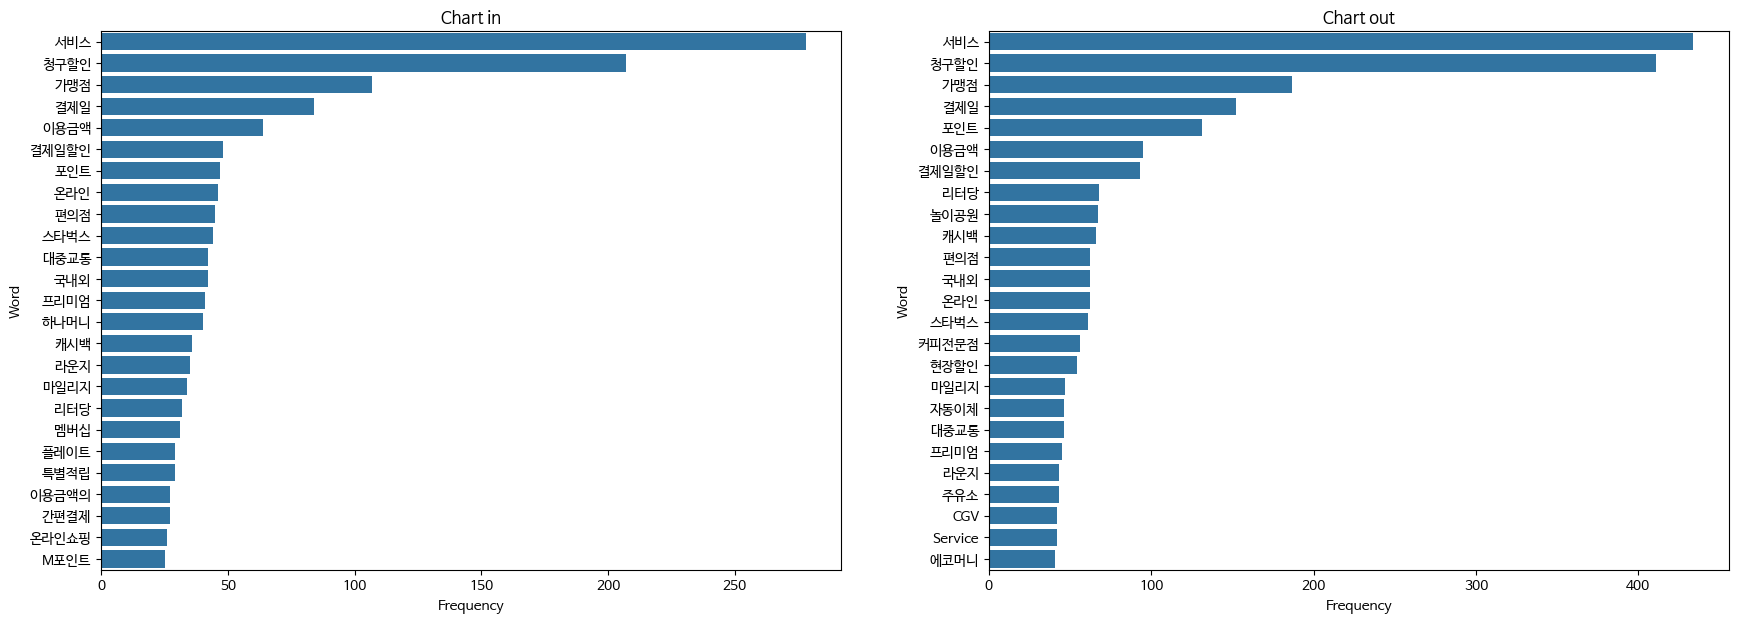

In [ ]:
word_freq_in = Counter(lemreg_text_in)
word_freq_out = Counter(lemreg_text_out)

in_freq_df = pd.DataFrame(word_freq_in.items(), columns = ['Word', 'Frequency'])
in_freq_df = in_freq_df.sort_values(by = 'Frequency', ascending = False)
out_freq_df = pd.DataFrame(word_freq_out.items(), columns = ['Word', 'Frequency'])
out_freq_df = out_freq_df.sort_values(by = 'Frequency', ascending = False)

in_100 = in_freq_df.head(25)
# in_100 = in_100[::-1]
out_100 = out_freq_df.head(25)
# out_100 = out_100[::-1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

sns.barplot(data=in_100, y='Word', x='Frequency',
            ax=ax[0]).set_title('Chart in')
sns.barplot(data=out_100, y='Word', x='Frequency',
            ax=ax[1]).set_title('Chart out')

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

**\< Chart in \>**

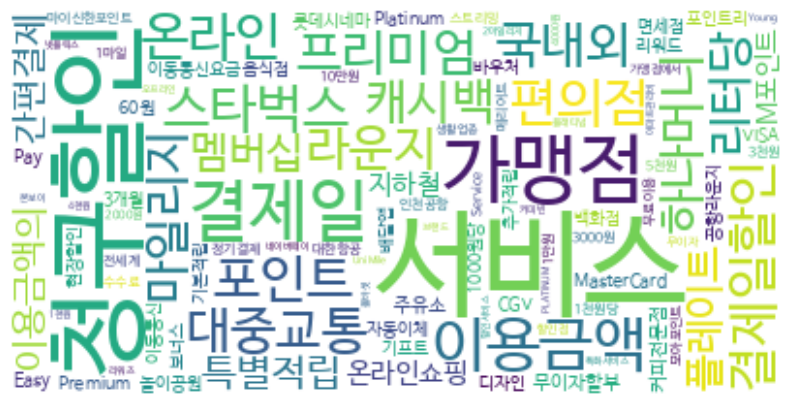

In [ ]:
wc = WordCloud(background_color = "white",
               max_words = 100,
               max_font_size = 60,
               font_path='NanumBarunGothic'
               )
wc.generate_from_frequencies(word_freq_in)

plt.figure(figsize = (10, 6))
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

**\< Chart out \>**

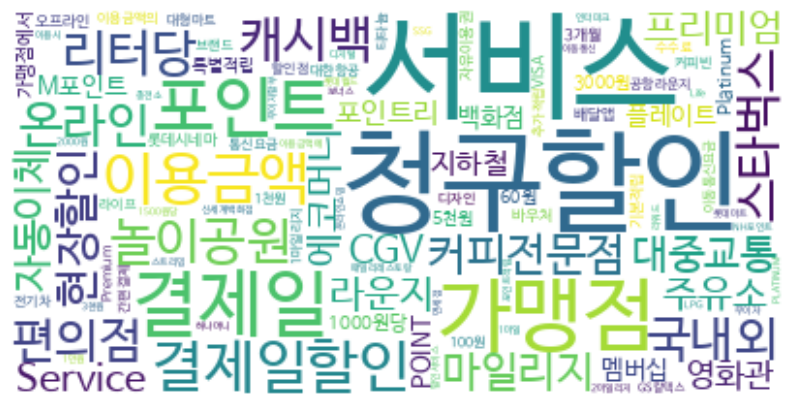

In [ ]:
wc = WordCloud(background_color = "white",
               max_words = 100,
               max_font_size = 60,
               font_path='NanumBarunGothic'
               )
wc.generate_from_frequencies(word_freq_out)

plt.figure(figsize = (10, 6))
plt.axis("off")
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

### 2-1-2. 혜택 유무에 따른 더미변수 추가

In [ ]:
df['p_concat'] = df['promotions']+df['all_promotions']
# df['p_concat'] = df['promotions_nlp']+df['all_promotions_nlp']

In [ ]:
df['point'] = 0   # 적립형인지

print(len(df[df['p_concat'].str.contains('적립')==True]))
df.loc[df['p_concat'].str.contains('적립')==True, 'point'] = 1

453


In [ ]:
df['convenience_store'] = 0   # 편의점/마트
df['cafe'] = 0   # 카페/베이커리
df['food_delivery'] = 0   # 식비
df['medical'] = 0   # 의료
df['edu'] = 0   # 교육
df['life_finance'] = 0   # 생활/금융
df['online'] = 0   # 온라인 결제
df['shopping'] = 0   # 쇼핑
df['transportation'] = 0   # 교통
df['travel'] = 0   # 여행
df['streaming'] = 0   # 구독/스트리밍 서비스
df['beauty'] = 0   # 미용
df['sprots'] = 0   # 스포츠/레저
df['enter'] = 0   # 문화관람
df['franchisee'] = 0   # 가맹점

In [ ]:
df.loc[df['p_concat'].str.contains('편의점|생활업종|마트')==True, 'convenience_store'] = 1
df.loc[df['p_concat'].str.contains('카페|스타벅스|커피|베이커리|제과점|뚜레쥬르')==True, 'cafe'] = 1
df.loc[df['p_concat'].str.contains('요식업|외식업종|음식점|식품|배달|외식|요기요|배민')==True, 'food_delivery'] = 1
df.loc[df['p_concat'].str.contains('병원|의료|약국|의원')==True, 'medical'] = 1
df.loc[df['p_concat'].str.contains('서점|강의|학원|교육|학습지|어린이집|보육')==True, 'edu'] = 1
df.loc[df['p_concat'].str.contains('주거|공과금|아파트관리비|임대료|전기세|가스비|통신|휴대폰요금|LGU+|보험|대출|금융수수료')==True, 'life_finance'] = 1
df.loc[df['p_concat'].str.contains('온라인쇼핑|온라인 쇼핑|홈쇼핑|간편결제|간편 결제|네이버|쿠팡')==True, 'online'] = 1
df.loc[(df['p_concat'].str.contains('백화점|다이소|쇼핑|아울렛|오프라인 쇼핑|오프라인쇼핑')==True)&(df['p_concat'].str.contains('온라인 쇼핑|온라인쇼핑')!=True), 'shopping'] = 1
df.loc[df['p_concat'].str.contains('주유|버스|교통|지하철|KTX|SRT|택시|전기차|LPG|통행료|자동차|GS칼텍스')==True, 'transportation'] = 1
df.loc[df['p_concat'].str.contains('여행|호텔|라운지|공항|항공|숙박')==True, 'travel'] = 1
df.loc[df['p_concat'].str.contains('구독|스트리밍|OTT|디즈니플러스|넷플릭스|wave|온라인음원|유튜브')==True, 'streaming'] = 1
df.loc[df['p_concat'].str.contains('미용|올리브영|화장|뷰티')==True, 'beauty'] = 1
df.loc[df['p_concat'].str.contains('운동|골프|스포츠|피트니스|헬스')==True, 'sprots'] = 1
df.loc[df['p_concat'].str.contains('놀이공원|워터파크|영화|전시|뮤지컬|연극|롯데시네마|CGV|메가박스')==True, 'enter'] = 1
df.loc[df['p_concat'].str.contains('가맹|가맹점')==True, 'franchisee'] = 1

In [ ]:
df2 = df.drop('promotions', axis=1)
df2 = df2.drop('promotions_nlp', axis=1)
df2 = df2.drop('all_promotions', axis=1)
df2 = df2.drop('all_promotions_nlp', axis=1)
df2 = df2.drop('p_concat', axis=1)

In [ ]:
df2['fee'].value_counts()

fee
국내전용 15000원  해외겸용 15000원     83
국내전용 20000원  해외겸용 20000원     82
국내전용 10000원  해외겸용 10000원     61
국내전용 12000원  해외겸용 12000원     42
해외겸용 10000원                  42
                             ..
국내전용 150000원  해외겸용150000원     1
국내전용 25000원  해외겸용 27000원      1
면제                            1
국내전용 200000원  해외겸용 210000     1
국내전용 90000원  해외겸용 90000원      1
Name: count, Length: 202, dtype: int64

In [ ]:
df2.head(2)

,card_company,card_name,fee,perform,brand,rank,chart_in,point,convenience_store,cafe,...,life_finance,online,shopping,transportation,travel,streaming,beauty,sprots,enter,franchisee
0,신한카드,신한카드 Mr.Life,해외겸용 15000원,30,VISA,4.951613,1.0,0,1,0,...,1,1,0,1,0,0,0,0,0,0
1,KB국민카드,KB국민 My WE:SH 카드,국내전용 15000원 해외겸용 15000원,40,Mastercard AMEX,1.000000,1.0,0,1,1,...,1,0,0,1,0,1,1,1,1,0


In [ ]:
# save
df2.to_csv('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/preprocessing_info_4year.csv', index=False)

## 2-2. 실적 비교

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/preprocessing_info_4year.csv')
print(len(df))
df.head(2)

923


,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,travel,streaming,beauty,sprots,enter,franchisee,rank_x,chart_in,rank_y,count
0,현대카드,대한항공카드 the First,500000,0,Mastercard,1,0,1,0,0,...,1,0,0,0,0,1,100.0,1,100,1
1,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,0,0,0,0,1,1,100.0,1,100,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   card_company       923 non-null    object 
 1   card_name          923 non-null    object 
 2   fee                923 non-null    int64  
 3   perform            923 non-null    int64  
 4   brand              887 non-null    object 
 5   point              923 non-null    int64  
 6   convenience_store  923 non-null    int64  
 7   cafe               923 non-null    int64  
 8   food_delivery      923 non-null    int64  
 9   medical            923 non-null    int64  
 10  edu                923 non-null    int64  
 11  life_finance       923 non-null    int64  
 12  online             923 non-null    int64  
 13  shopping           923 non-null    int64  
 14  transportation     923 non-null    int64  
 15  travel             923 non-null    int64  
 16  streaming          923 non

In [ ]:
df = df[(df['perform']<75)&(df['fee']<100000)]

In [ ]:
df = df[(df['card_company']!='차이')]
df = df[(df['card_company']!='케이뱅크')]
df = df[(df['card_company']!='BNK경남은행')]
df = df[(df['card_company']!='SC제일은행')]
df = df[(df['card_company']!='Sh수협은행')]
df = df[(df['card_company']!='SSGPAY. CARD')]
df.reset_index(drop=True, inplace=True)

In [ ]:
sns.color_palette('Pastel1')

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

In [ ]:
df__ = df[(df['fee']<80000)&(df['card_company']!='현대백화점')&(df['card_company']!='신협')&(df['card_company']!='광주은행')&
 (df['card_company']!='전북은행')&(df['card_company']!='제주은행')&(df['card_company']!='DGB대구은행')&(df['card_company']!='BNK부산은행')]

<Axes: xlabel='card_company', ylabel='fee'>

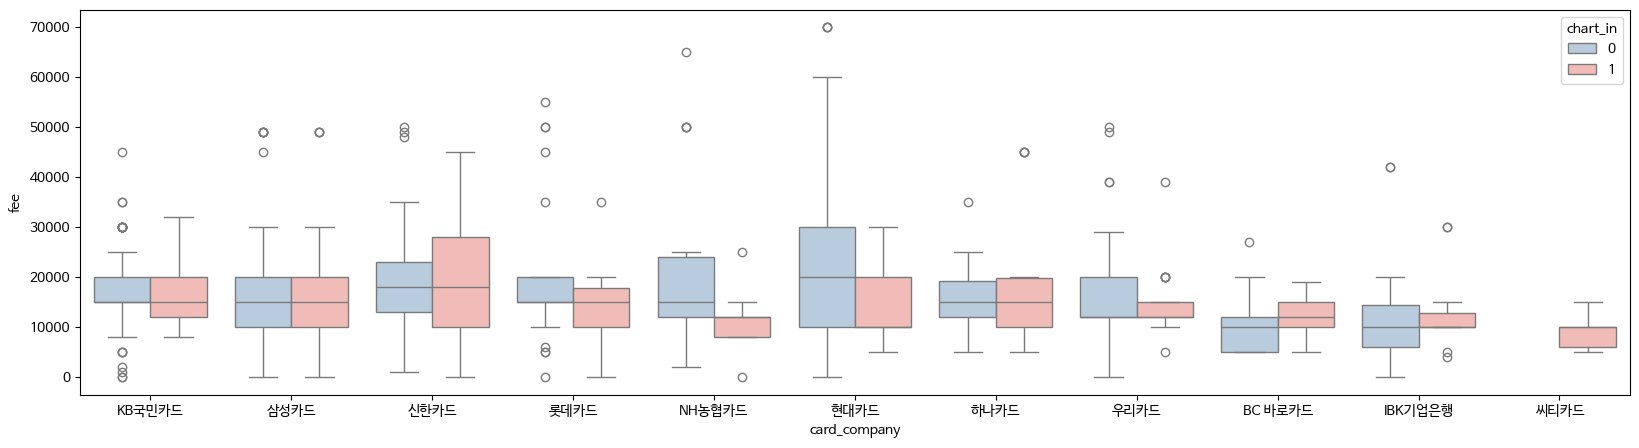

In [ ]:
plt.figure(figsize=(20, 5))

colors = sns.color_palette('Pastel1')
sns.boxplot(data=df__,
            x='card_company', y='fee', hue='chart_in',
            palette=[colors[1], colors[0]])

<Axes: xlabel='card_company', ylabel='perform'>

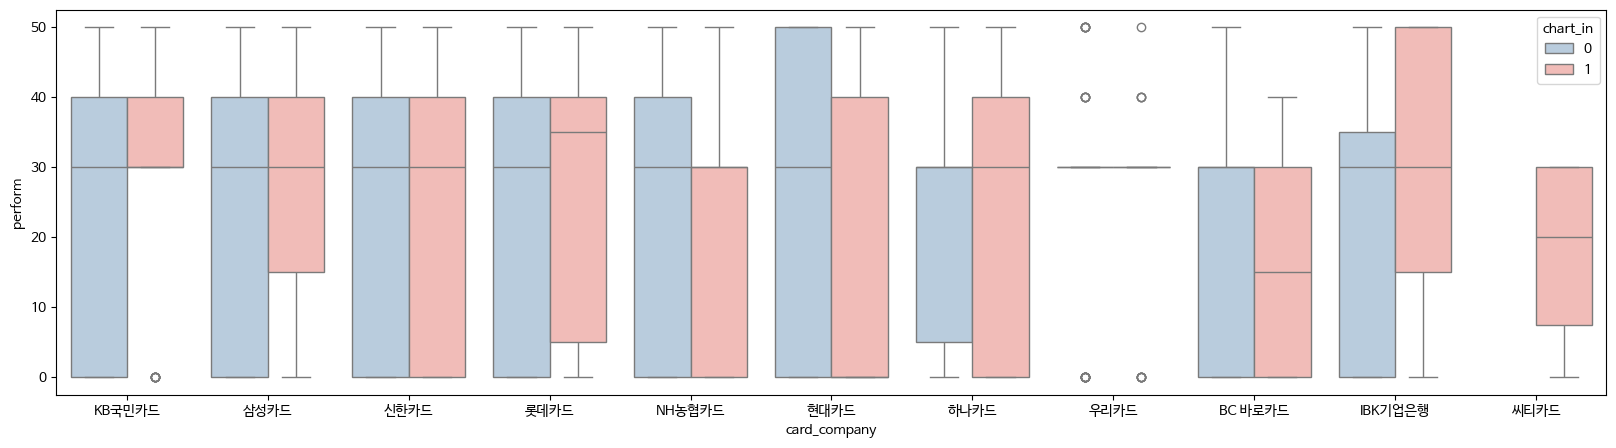

In [ ]:
plt.figure(figsize=(20, 5))
sns.boxplot(data=df__, x='card_company', y='perform', hue='chart_in',
            palette=[colors[1], colors[0]])

## 2-3. 상세 혜택 확인

In [ ]:
df.head()

,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,travel,streaming,beauty,sprots,enter,franchisee,rank_x,chart_in,rank_y,count
0,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,0,0,0,0,1,1,100.0,1,100,1
1,삼성카드,K-패스 삼성카드,10000,40,Mastercard,0,0,1,0,0,...,0,0,0,0,0,0,100.0,1,100,1
2,삼성카드,taptap DRIVE,10000,30,VISA,0,1,1,0,0,...,0,0,0,0,0,0,99.0,1,99,2
3,KB국민카드,청춘대로 꿀맛α카드,15000,40,Mastercard,0,0,1,1,0,...,0,0,0,0,0,1,98.5,1,97,2
4,신한카드,신한카드 Deep Once,23000,40,Mastercard,1,0,0,0,0,...,0,1,0,0,0,0,98.0,1,98,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   card_company       797 non-null    object 
 1   card_name          797 non-null    object 
 2   fee                797 non-null    int64  
 3   perform            797 non-null    int64  
 4   brand              765 non-null    object 
 5   point              797 non-null    int64  
 6   convenience_store  797 non-null    int64  
 7   cafe               797 non-null    int64  
 8   food_delivery      797 non-null    int64  
 9   medical            797 non-null    int64  
 10  edu                797 non-null    int64  
 11  life_finance       797 non-null    int64  
 12  online             797 non-null    int64  
 13  shopping           797 non-null    int64  
 14  transportation     797 non-null    int64  
 15  travel             797 non-null    int64  
 16  streaming          797 non

In [ ]:
print(len(df[(df['chart_in']==1)&(df['shopping']==1)])/len(df[(df['chart_in']==1)]), len(df[(df['chart_in']==1)&(df['shopping']==0)])/len(df[(df['chart_in']==1)]))
print(len(df[(df['chart_in']==0)&(df['shopping']==1)])/len(df[(df['chart_in']==0)]), len(df[(df['chart_in']==0)&(df['shopping']==0)])/len(df[(df['chart_in']==0)]))

0.16988416988416988 0.8301158301158301
0.1821561338289963 0.8178438661710037


In [ ]:
print(len(df[(df['chart_in']==1)&(df['transportation']==1)])/len(df[(df['chart_in']==1)]), len(df[(df['chart_in']==1)&(df['transportation']==0)])/len(df[(df['chart_in']==1)]))
print(len(df[(df['chart_in']==0)&(df['transportation']==1)])/len(df[(df['chart_in']==0)]), len(df[(df['chart_in']==0)&(df['transportation']==0)])/len(df[(df['chart_in']==0)]))

0.5444015444015444 0.4555984555984556
0.4033457249070632 0.5966542750929368


In [ ]:
mean_df = pd.read_excel('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/promotion_mean.xlsx')
mean_df.set_index('category', inplace=True)
mean_df

,in_1,in_0,out_1,out_0
category,,,,
convenience_store,0.308880,0.691120,0.237918,0.762082
cafe,0.378378,0.621622,0.351301,0.648699
food_delivery,0.250965,0.749035,0.131970,0.868030
medical,0.100386,0.899614,0.070632,0.929368
edu,0.100386,0.899614,0.076208,0.923792
life_finance,0.320463,0.679537,0.267658,0.732342
online,0.359073,0.640927,0.200743,0.799257
shopping,0.169884,0.830116,0.182156,0.817844
transportation,0.544402,0.455598,0.403346,0.596654


In [ ]:
sns.color_palette('Pastel1')

[(0.984313725490196, 0.7058823529411765, 0.6823529411764706),
 (0.7019607843137254, 0.803921568627451, 0.8901960784313725),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (0.8705882352941177, 0.796078431372549, 0.8941176470588236),
 (0.996078431372549, 0.8509803921568627, 0.6509803921568628),
 (1.0, 1.0, 0.8),
 (0.8980392156862745, 0.8470588235294118, 0.7411764705882353),
 (0.9921568627450981, 0.8549019607843137, 0.9254901960784314),
 (0.9490196078431372, 0.9490196078431372, 0.9490196078431372)]

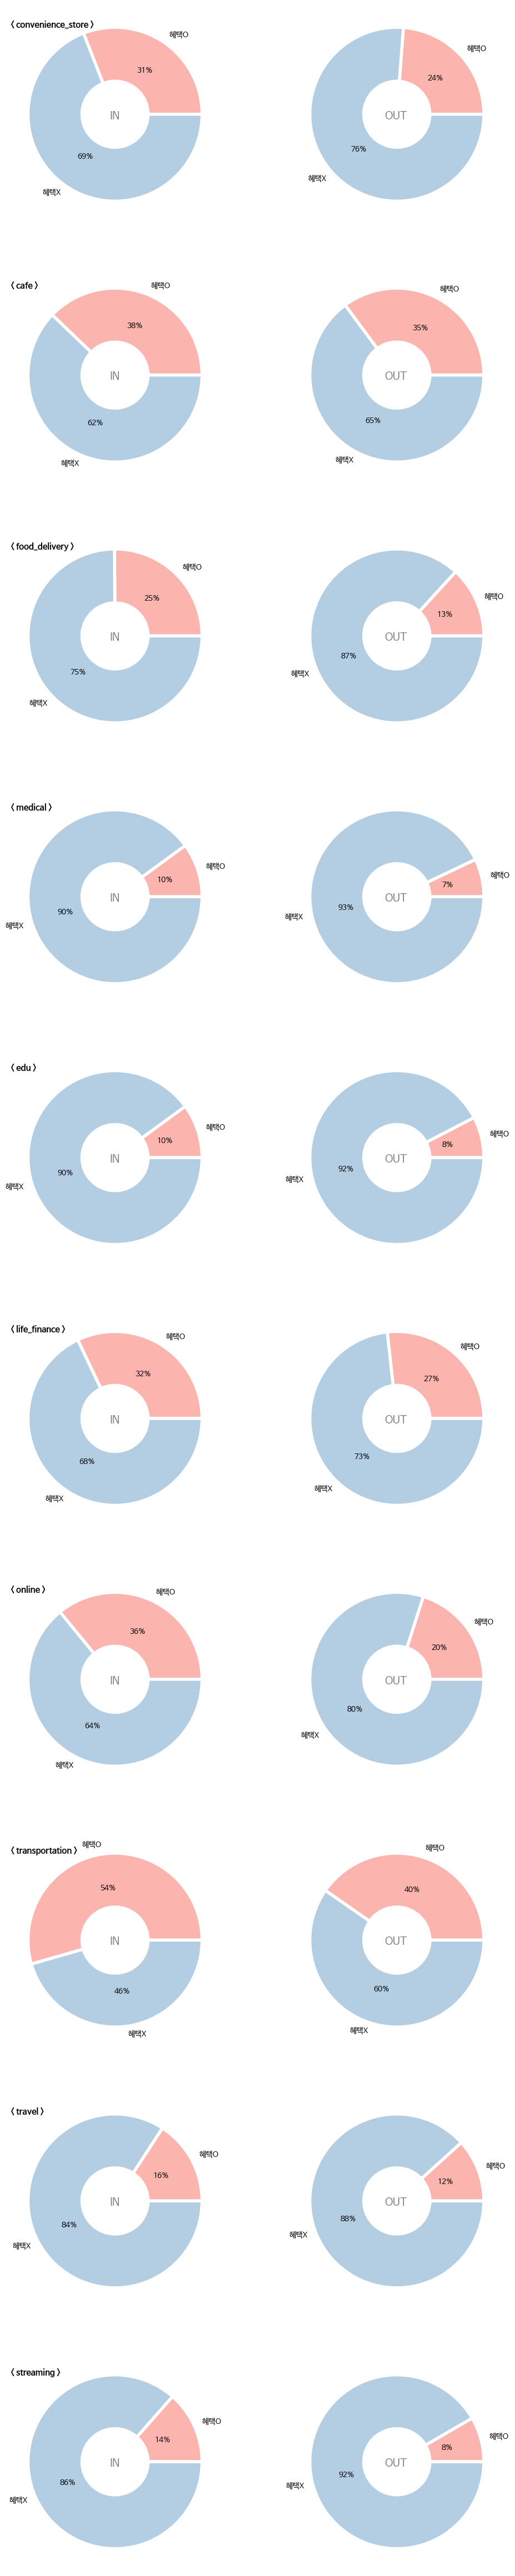

In [ ]:
fig, axs = plt.subplots(10, 2, figsize=(12, 60))

df_1 = mean_df[['in_1', 'in_0']]
df_0 = mean_df[['out_1', 'out_0']]

vis_col = ['convenience_store', 'cafe', 'food_delivery', 'medical', 'edu',
           'life_finance', 'online', 'transportation', 'travel', 'streaming']

wedgeprops = {"linewidth": 4, 'width':0.62, "edgecolor":"white"}
colors = sns.color_palette('Pastel1')

font1 = {'color':  'black',
         'weight': 'bold',
         'size': 11}
font2 = {'color':  'gray',
         'weight': 'normal',
         'size': 14}

for i in range(10):
  # for j in range(2):
  axs[i][0].pie(list(df_1.loc[vis_col[i], :]),
              labels=['혜택O', '혜택X'],
              colors = colors, autopct='%.0f%%',
              # explode = [0.08, 0],
              counterclock=True,
              wedgeprops = wedgeprops
             )#.set_title(f'Chart IN')
  axs[i][1].pie(list(df_0.loc[vis_col[i], :]),
              labels=['혜택O', '혜택X'],
              colors = colors, autopct='%.0f%%',
              # explode = [0.08, 0],
              counterclock=True,
              wedgeprops = wedgeprops,
              )#.set_title(f'Cahrt OUT')
  axs[i][0].text(-1.2, 1, f'< {vis_col[i]} >', fontdict=font1)
  axs[i][0].text(-0.06, -0.05, 'IN', fontdict=font2)
  # axs[i][1].text(-1.2, 1, f'< {vis_col[i]} >', fontdict=font1)
  axs[i][1].text(-0.14, -0.05, 'OUT', fontdict=font2)

# 3. 가장 높았던 순위 추가

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/credit_card_top100_4year.csv')
# df = pd.read_csv('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/preprocessing_info_4year.csv')
print(len(df))
df.head()

6200


,date,rank,card_name,card_company,card_href
0,2019-01-31,1,LIKIT FUN 카드,롯데카드,NaN
1,2019-01-31,2,삼성카드 taptap O,삼성카드,https://card-gorilla.com/card/detail/51
2,2019-01-31,3,신한카드 Deep Dream,신한카드,https://card-gorilla.com/card/detail/32
3,2019-01-31,4,NEW 씨티 클리어,씨티카드,https://card-gorilla.com/card/detail/101
4,2019-01-31,5,DA@카드의정석,우리카드,https://card-gorilla.com/card/detail/87


In [ ]:
df.sort_values(['card_name', 'rank'])

,date,rank,card_name,card_company,card_href
5084,2023-03-31,85,#MY WAY 카드,하나카드,https://card-gorilla.com/card/detail/2409
4995,2023-02-28,96,#MY WAY 카드,하나카드,https://card-gorilla.com/card/detail/2409
4799,2022-12-31,100,#MY WAY 카드,하나카드,https://card-gorilla.com/card/detail/2409
3553,2021-12-31,54,#Pay 신한카드,신한카드,https://card-gorilla.com/card/detail/2258
3658,2022-01-31,59,#Pay 신한카드,신한카드,https://card-gorilla.com/card/detail/2258
...,...,...,...,...,...
2319,2020-12-31,20,현대카드ZERO(할인형),현대카드,https://card-gorilla.com/card/detail/410
2424,2021-01-31,25,현대카드ZERO(할인형),현대카드,https://card-gorilla.com/card/detail/410
2538,2021-02-28,39,현대카드ZERO(할인형),현대카드,https://card-gorilla.com/card/detail/410
2671,2021-03-31,72,현대카드ZERO(할인형),현대카드,https://card-gorilla.com/card/detail/410


In [ ]:
pre_df = pd.read_csv('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/preprocessing_info_4year.csv')
print(len(pre_df))
pre_df.head()

923


,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,shopping,transportation,travel,streaming,beauty,sprots,enter,franchisee,rank,chart_in
0,현대카드,대한항공카드 the First,500000,0,Mastercard,1,0,1,0,0,...,0,0,1,0,0,0,0,1,100.0,1
1,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,0,0,0,0,0,0,1,1,100.0,1
2,삼성카드,K-패스 삼성카드,10000,40,Mastercard,0,0,1,0,0,...,0,1,0,0,0,0,0,0,100.0,1
3,삼성카드,taptap DRIVE,10000,30,VISA,0,1,1,0,0,...,0,1,0,0,0,0,0,0,99.0,1
4,KB국민카드,청춘대로 꿀맛α카드,15000,40,Mastercard,0,0,1,1,0,...,0,0,0,0,0,0,0,1,98.5,1


In [ ]:
df[df['card_name']=='taptap DRIVE']

,date,rank,card_name,card_company,card_href
4398,2022-08-31,99,taptap DRIVE,삼성카드,https://card-gorilla.com/card/detail/658
5198,2023-04-30,99,taptap DRIVE,삼성카드,https://card-gorilla.com/card/detail/658


In [ ]:
df1 = df.sort_values(['card_name', 'rank']).drop_duplicates(['card_name', 'card_company'])
df1.head

,date,rank,card_name,card_company,card_href
5084,2023-03-31,85,#MY WAY 카드,하나카드,https://card-gorilla.com/card/detail/2409
3553,2021-12-31,54,#Pay 신한카드,신한카드,https://card-gorilla.com/card/detail/2258
5227,2023-05-31,28,#tag1카드 Navy,하나카드,https://card-gorilla.com/card/detail/248
4462,2022-09-30,63,#tag1카드 Orange,하나카드,https://card-gorilla.com/card/detail/247
4704,2022-12-31,5,1Q Daily+,하나카드,https://card-gorilla.com/card/detail/238
...,...,...,...,...,...
2535,2021-02-28,36,현대카드ZERO MOBILE Edition2(할인형),현대카드,https://card-gorilla.com/card/detail/609
430,2019-05-31,31,현대카드ZERO MOBILE(포인트형),현대카드,https://card-gorilla.com/card/detail/418
1750,2020-06-30,51,현대카드ZERO MOBILE(할인형),현대카드,https://card-gorilla.com/card/detail/419
1609,2020-05-31,10,현대카드ZERO(포인트형),현대카드,https://card-gorilla.com/card/detail/420


In [ ]:
df2 = pd.DataFrame(df.value_counts(['card_name', 'card_company'])).reset_index()
df2.head()

,card_name,card_company,count
0,청춘대로 톡톡카드,KB국민카드,62
1,신한카드 Deep Oil,신한카드,62
2,신한카드 RPM+ Platinum#,신한카드,62
3,삼성카드 & MILEAGE PLATINUM (스카이패스),삼성카드,62
4,신한카드 Mr.Life,신한카드,62


In [ ]:
merge1 = pd.merge(pre_df, df1[['card_name', 'card_company', 'rank']], on=['card_name', 'card_company'], how='left')#.drop_duplicates(['card_name', 'card_company'])
merge1

,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,transportation,travel,streaming,beauty,sprots,enter,franchisee,rank_x,chart_in,rank_y
0,현대카드,대한항공카드 the First,500000,0,Mastercard,1,0,1,0,0,...,0,1,0,0,0,0,1,100.0,1,100.0
1,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,0,0,0,0,0,1,1,100.0,1,100.0
2,삼성카드,K-패스 삼성카드,10000,40,Mastercard,0,0,1,0,0,...,1,0,0,0,0,0,0,100.0,1,100.0
3,삼성카드,taptap DRIVE,10000,30,VISA,0,1,1,0,0,...,1,0,0,0,0,0,0,99.0,1,99.0
4,KB국민카드,청춘대로 꿀맛α카드,15000,40,Mastercard,0,0,1,1,0,...,0,0,0,0,0,0,1,98.5,1,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,제주은행,국민행복카드,0,0,NaN,1,0,1,0,1,...,0,0,0,0,0,0,0,0.0,0,NaN
919,우리카드,다둥이 행복카드,0,0,VISA,1,0,0,0,0,...,1,0,0,0,0,1,0,0.0,0,NaN
920,우리카드,국민행복카드 S2,0,30,BC Mastercard,0,0,0,0,1,...,0,0,0,0,0,0,1,0.0,0,NaN
921,삼성카드,삼성 iD POCKET 카드,0,0,NaN,0,1,1,1,0,...,1,0,0,0,0,0,0,0.0,0,NaN


In [ ]:
merge2 = pd.merge(merge1, df2[['card_name', 'card_company', 'count']], on=['card_name', 'card_company'], how='left')#.drop_duplicates(['card_name', 'card_company'])
merge2

,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,travel,streaming,beauty,sprots,enter,franchisee,rank_x,chart_in,rank_y,count
0,현대카드,대한항공카드 the First,500000,0,Mastercard,1,0,1,0,0,...,1,0,0,0,0,1,100.0,1,100.0,1.0
1,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,0,0,0,0,1,1,100.0,1,100.0,1.0
2,삼성카드,K-패스 삼성카드,10000,40,Mastercard,0,0,1,0,0,...,0,0,0,0,0,0,100.0,1,100.0,1.0
3,삼성카드,taptap DRIVE,10000,30,VISA,0,1,1,0,0,...,0,0,0,0,0,0,99.0,1,99.0,2.0
4,KB국민카드,청춘대로 꿀맛α카드,15000,40,Mastercard,0,0,1,1,0,...,0,0,0,0,0,1,98.5,1,97.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,제주은행,국민행복카드,0,0,NaN,1,0,1,0,1,...,0,0,0,0,0,0,0.0,0,NaN,NaN
919,우리카드,다둥이 행복카드,0,0,VISA,1,0,0,0,0,...,0,0,0,0,1,0,0.0,0,NaN,NaN
920,우리카드,국민행복카드 S2,0,30,BC Mastercard,0,0,0,0,1,...,0,0,0,0,0,1,0.0,0,NaN,NaN
921,삼성카드,삼성 iD POCKET 카드,0,0,NaN,0,1,1,1,0,...,0,0,0,0,0,0,0.0,0,NaN,NaN


In [ ]:
merge2[['rank_y', 'count']] = merge2[['rank_y', 'count']].fillna(0)
merge2 = merge2.astype({'rank_y':'int', 'count':'int'})

In [ ]:
merge2

,card_company,card_name,fee,perform,brand,point,convenience_store,cafe,food_delivery,medical,...,travel,streaming,beauty,sprots,enter,franchisee,rank_x,chart_in,rank_y,count
0,현대카드,대한항공카드 the First,500000,0,Mastercard,1,0,1,0,0,...,1,0,0,0,0,1,100.0,1,100,1
1,KB국민카드,ONE카드,15000,0,Mastercard,1,0,0,0,0,...,0,0,0,0,1,1,100.0,1,100,1
2,삼성카드,K-패스 삼성카드,10000,40,Mastercard,0,0,1,0,0,...,0,0,0,0,0,0,100.0,1,100,1
3,삼성카드,taptap DRIVE,10000,30,VISA,0,1,1,0,0,...,0,0,0,0,0,0,99.0,1,99,2
4,KB국민카드,청춘대로 꿀맛α카드,15000,40,Mastercard,0,0,1,1,0,...,0,0,0,0,0,1,98.5,1,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,제주은행,국민행복카드,0,0,NaN,1,0,1,0,1,...,0,0,0,0,0,0,0.0,0,0,0
919,우리카드,다둥이 행복카드,0,0,VISA,1,0,0,0,0,...,0,0,0,0,1,0,0.0,0,0,0
920,우리카드,국민행복카드 S2,0,30,BC Mastercard,0,0,0,0,1,...,0,0,0,0,0,1,0.0,0,0,0
921,삼성카드,삼성 iD POCKET 카드,0,0,NaN,0,1,1,1,0,...,0,0,0,0,0,0,0.0,0,0,0


In [ ]:
merge2.to_csv('/content/gdrive/MyDrive/비즈니스애널리틱스/project_data/preprocessing_info_4year.csv', index=False)